# **Import Library & Load Dataset**

In [ ]:
# Import libary yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [ ]:
# Membuat file csv menjadi bentuk dataframe  
dataframe = pd.read_csv('/content/media prediction and its cost.csv')

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Melihat 5 baris pertama pada dataset
dataframe.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
# Melihat bentuk dimensi dataset(baris, kolom)
dataframe.shape

(60428, 40)

In [ ]:
# Daftar nama kolom pada dataset
dataframe.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [ ]:
# Melihat tipe data tiap kolom
dataframe.dtypes

food_category                  object
food_department                object
food_family                    object
store_sales(in millions)      float64
store_cost(in millions)       float64
unit_sales(in millions)       float64
promotion_name                 object
sales_country                  object
marital_status                 object
gender                         object
total_children                float64
education                      object
member_card                    object
occupation                     object
houseowner                     object
avg_cars_at home(approx)      float64
avg. yearly_income             object
num_children_at_home          float64
avg_cars_at home(approx).1    float64
brand_name                     object
SRP                           float64
gross_weight                  float64
net_weight                    float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_type  

In [ ]:
# Melihat informasi dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [ ]:
# Describe dataset
dataframe.describe(include='all')

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
count,60428,60428,60428,60428.000000,60428.000000,60428.000000,60428,60428,60428,60428,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428,60428.000000
unique,45,22,3,NaN,NaN,NaN,49,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN
top,Vegetables,Produce,Food,NaN,NaN,NaN,Weekend Markdown,USA,S,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Daily Paper, Radio",NaN
freq,7440,8521,43284,NaN,NaN,NaN,2330,38892,30355,30942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6820,NaN
mean,NaN,NaN,NaN,6.541031,2.619460,3.093169,NaN,NaN,NaN,NaN,...,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,NaN,99.262366
std,NaN,NaN,NaN,3.463047,1.453009,0.827677,NaN,NaN,NaN,NaN,...,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,NaN,30.011257
min,NaN,NaN,NaN,0.510000,0.163200,1.000000,NaN,NaN,NaN,NaN,...,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,50.790000
25%,NaN,NaN,NaN,3.810000,1.500000,3.000000,NaN,NaN,NaN,NaN,...,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,69.650000
50%,NaN,NaN,NaN,5.940000,2.385600,3.000000,NaN,NaN,NaN,NaN,...,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,98.520000
75%,NaN,NaN,NaN,8.670000,3.484025,4.000000,NaN,NaN,NaN,NaN,...,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,126.620000


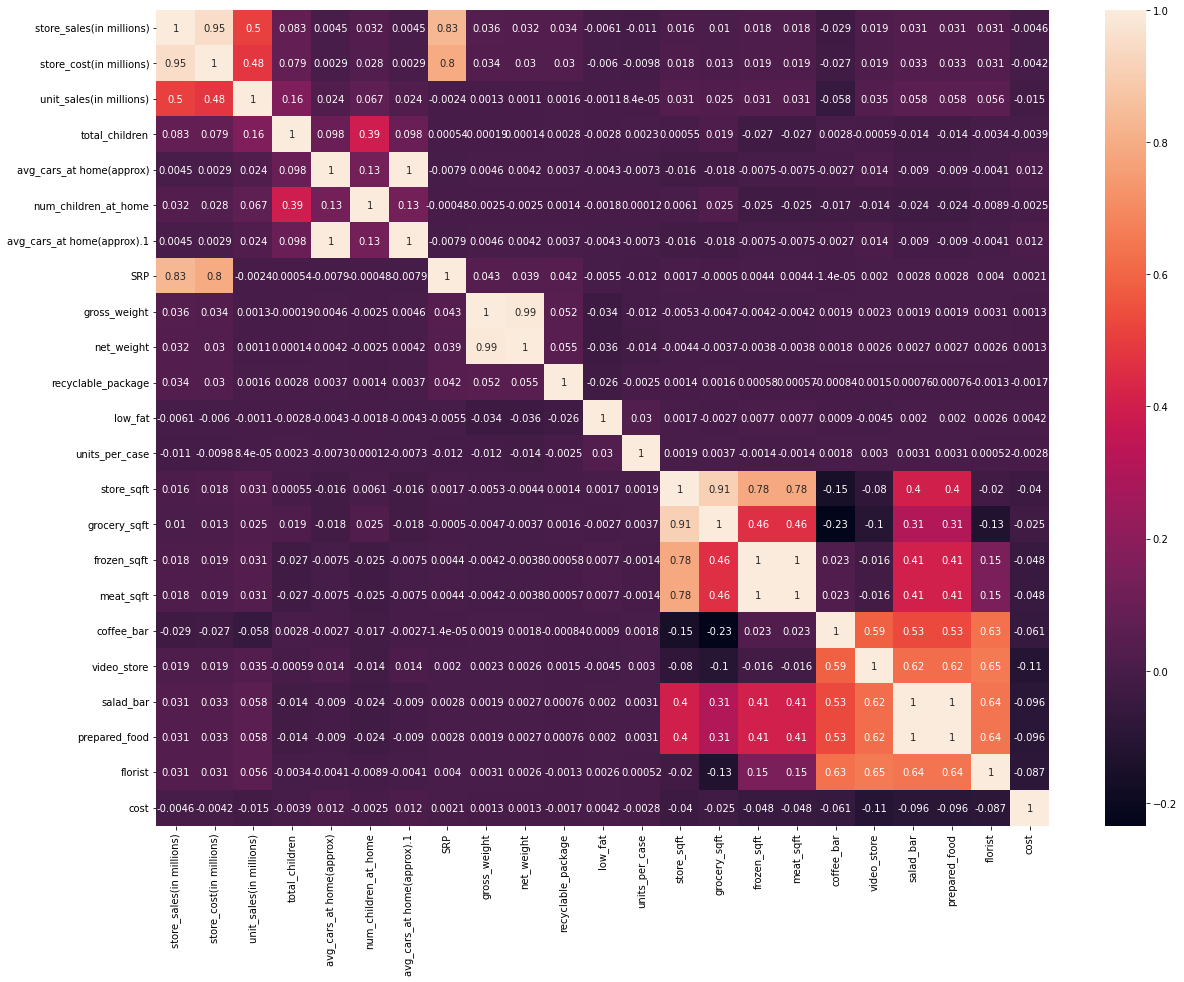

In [ ]:
# Heatmap korelasi antar variabel
plt.figure(figsize=(20,15))
sns.heatmap(dataframe.corr(), annot=True)

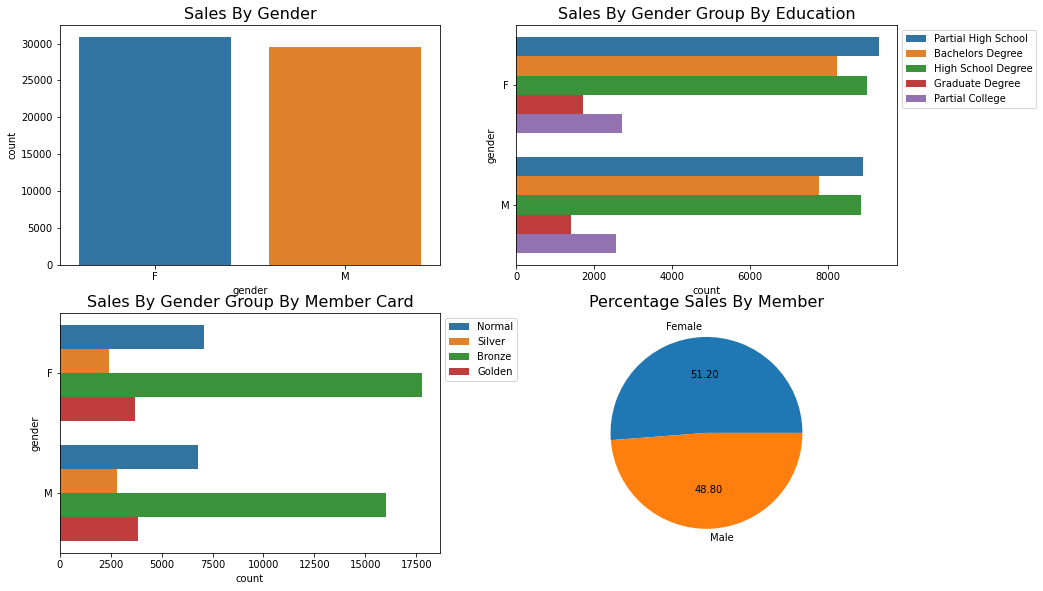

In [ ]:
#visualisasi berdasarkan gender
config = plt.figure(figsize=(15, 15))
config.add_subplot(3,2,1)
plt.title('Sales By Gender', size=16)
sns.countplot(x='gender',data = dataframe)

config.add_subplot(3,2,2)
plt.title('Sales By Gender Group By Education', size=16)
gender = sns.countplot(y='gender',data = dataframe, hue='education')
gender.legend(bbox_to_anchor= (1.,1))

config.add_subplot(3,2,3)
plt.title('Sales By Gender Group By Member Card', size=16)
member = sns.countplot(y='gender',data = dataframe, hue='member_card')
member.legend(bbox_to_anchor= (1.,1))

config.add_subplot(3,2,4)
plt.title('Percentage Sales By Member', size=16)
plt.pie(dataframe['gender'].value_counts(), labels=['Female','Male'], autopct="%0.2f")


plt.show()

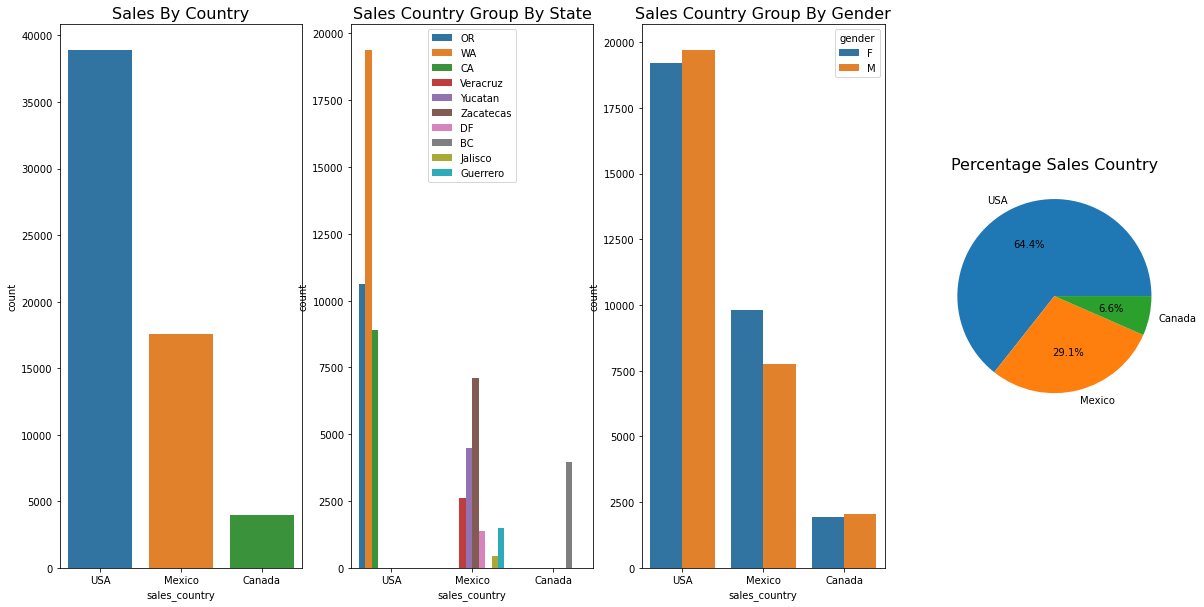

In [ ]:
#visualisasi berdasarkan sales country
config = plt.figure(figsize=(20, 10))
config.add_subplot(1,4,1)
plt.title('Sales By Country', size=16)
sns.countplot(x='sales_country',data = dataframe)

config.add_subplot(1,4,2)
plt.title('Sales Country Group By State', size=16)
sns.countplot(x='sales_country',data = dataframe, hue='store_state').legend()

config.add_subplot(1,4,3)
plt.title('Sales Country Group By Gender', size=16)
sns.countplot(x='sales_country',data = dataframe, hue='gender')

config.add_subplot(1,4,4)
plt.title('Percentage Sales Country', size=16)
plt.pie(dataframe['sales_country'].value_counts(), labels=dataframe['sales_country'].unique(), autopct="%1.1f%%")

plt.show()

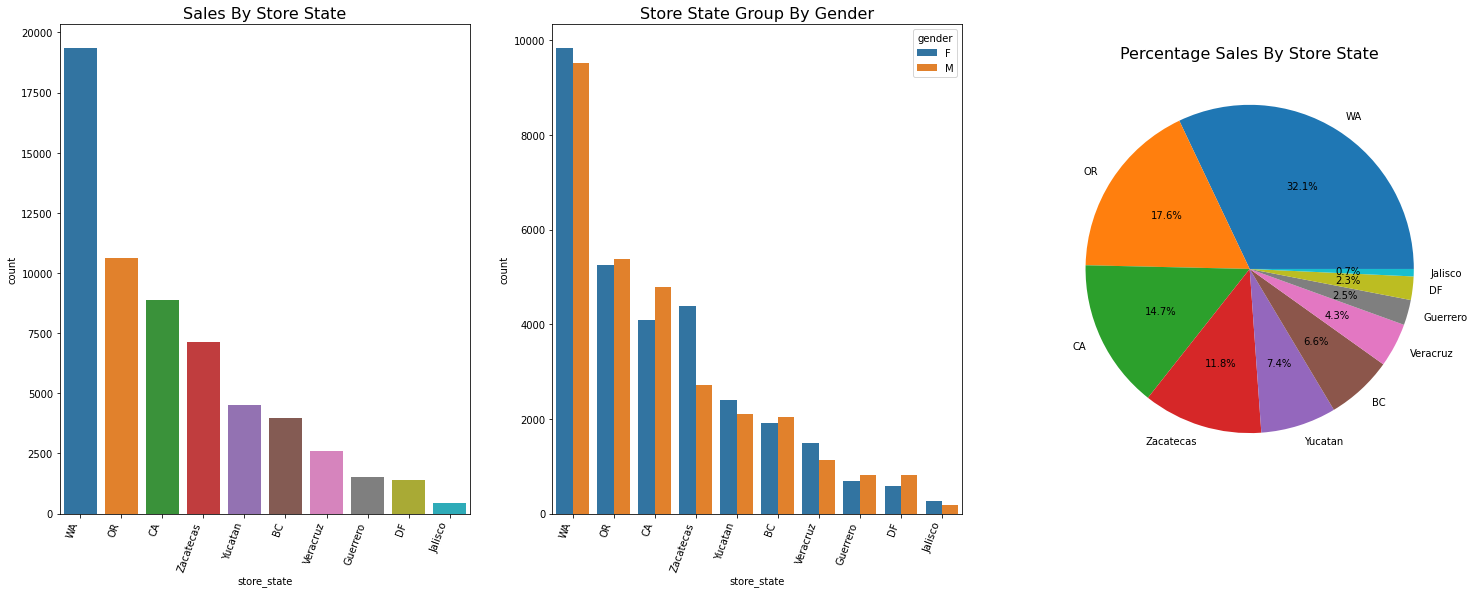

In [ ]:
# visualisasi berdasarkan store state
config = plt.figure(figsize=(25, 9))
config.add_subplot(1,3,1)
plt.title('Sales By Store State', size=16)
ss = sns.countplot(x='store_state',data = dataframe, order = dataframe['store_state'].value_counts().index)
ss.set_xticklabels(ss.get_xticklabels(),rotation=70, horizontalalignment='right')

config.add_subplot(1,3,2)
plt.title('Store State Group By Gender', size=16)
ss = sns.countplot(x='store_state',data = dataframe, hue='gender', order = dataframe['store_state'].value_counts().index)
ss.set_xticklabels(ss.get_xticklabels(),rotation=70, horizontalalignment='right')

config.add_subplot(1,3,3)
plt.title('Percentage Sales By Store State', size=16)
plt.pie(dataframe['store_state'].value_counts(), labels=dataframe['store_state'].value_counts().index.tolist(), autopct="%1.1f%%")

plt.show()

In [ ]:
df2 =  dataframe.replace({
                  '$10K - $30K' : 'Low',
                  '$30K - $50K' : 'Low',
                  '$50K - $70K' : 'Mid',
                  '$70K - $90K' : 'Mid',
                  '$90K - $110K' : 'High',
                  '$110K - $130K' : 'High',
                  '$130K - $150K' : 'High',
                  '$150K +' : 'High'
})

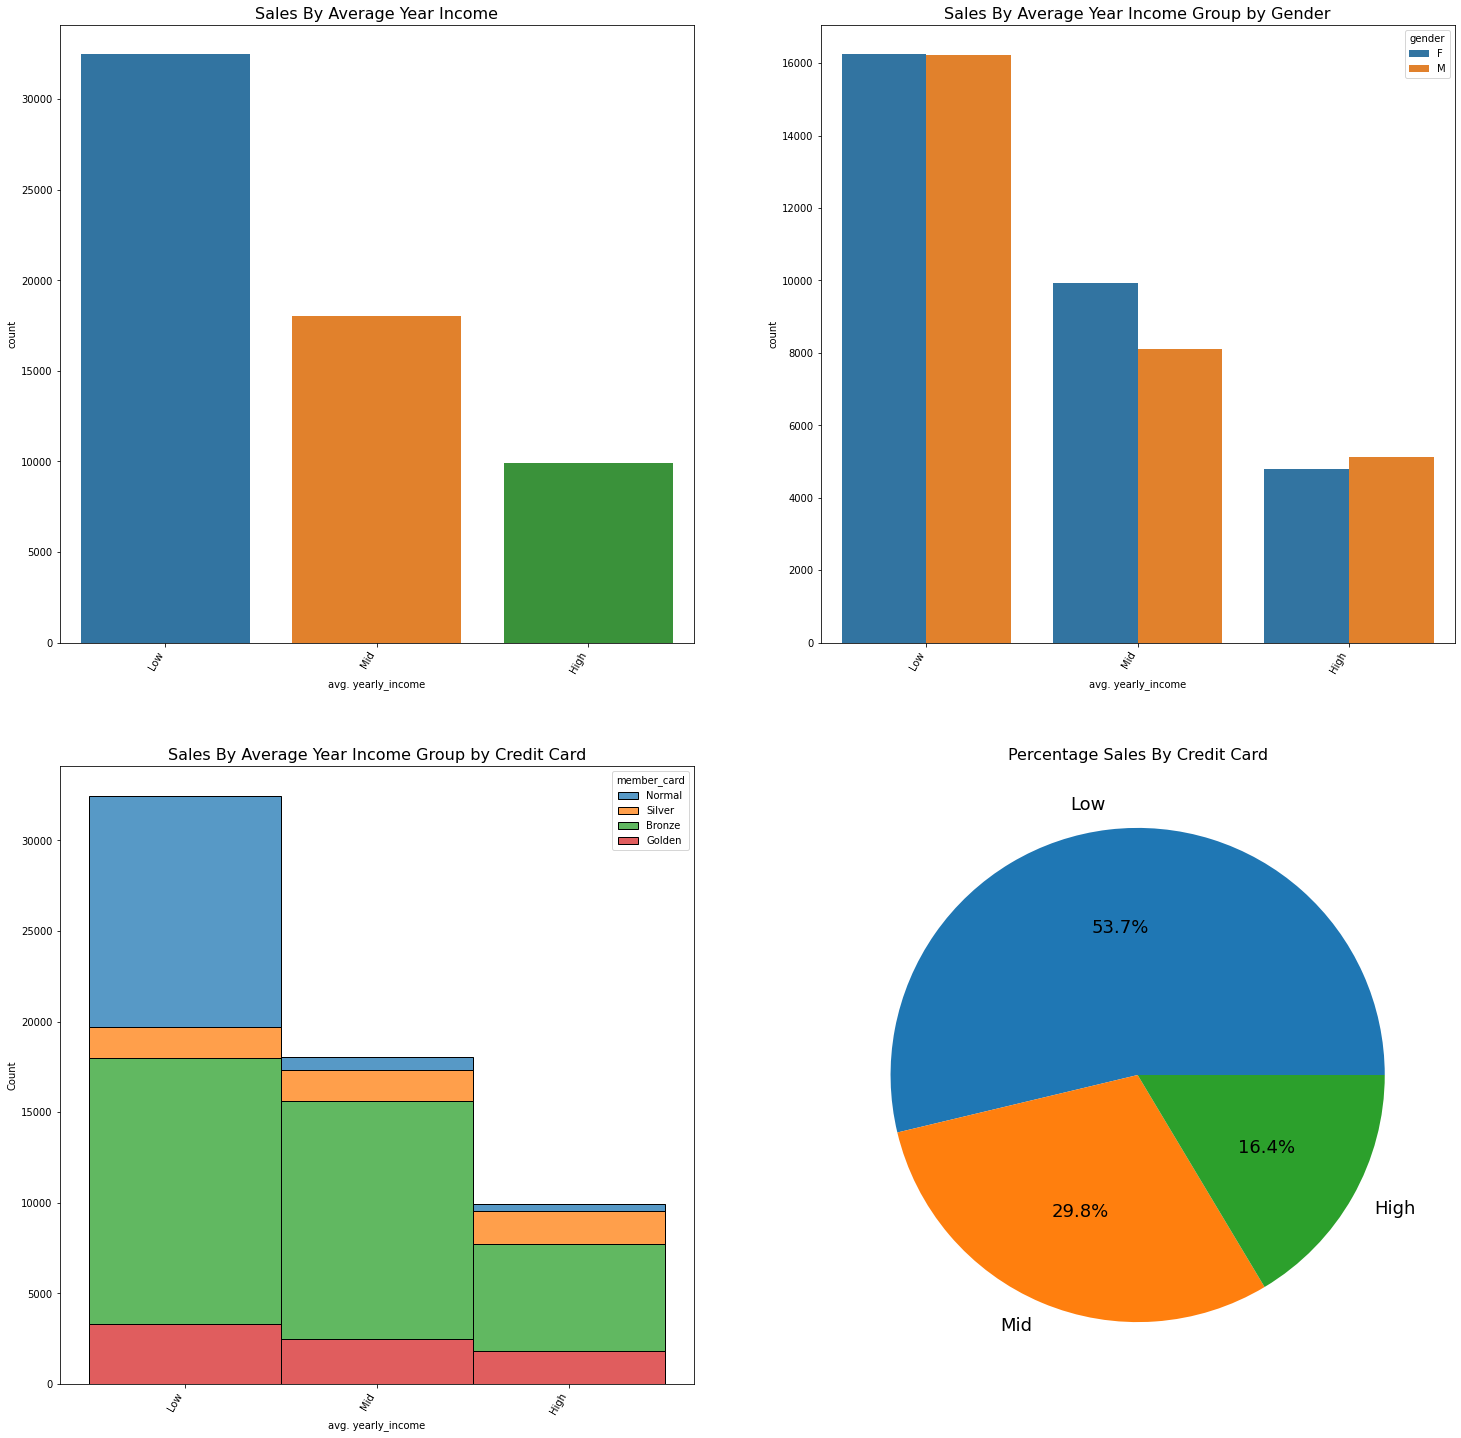

In [ ]:
# visualisasi berdasarkan average year income
config = plt.figure(figsize=(25, 25))

config.add_subplot(2,2,1)
plt.title('Sales By Average Year Income', size=16)
ss = sns.countplot(x='avg. yearly_income',data = df2)
ss.set_xticklabels(ss.get_xticklabels(),rotation=60, horizontalalignment='right')

config.add_subplot(2,2,2)
plt.title('Sales By Average Year Income Group by Gender', size=16)
ss = sns.countplot(x='avg. yearly_income',data = df2,hue='gender')
ss.set_xticklabels(ss.get_xticklabels(),rotation=60, horizontalalignment='right')

config.add_subplot(2,2,3)
plt.title('Sales By Average Year Income Group by Credit Card', size=16)
ss_stack= sns.histplot(x='avg. yearly_income',data = df2, hue = 'member_card',multiple="stack")
ss_stack.set_xticklabels(ss.get_xticklabels(),rotation=60, horizontalalignment='right')


config.add_subplot(2,2,4)
plt.title('Percentage Sales By Credit Card', size=16)
plt.pie(df2['avg. yearly_income'].value_counts(), labels=df2['avg. yearly_income'].unique(), autopct='%1.1f%%', textprops={'fontsize': 18})


plt.show()

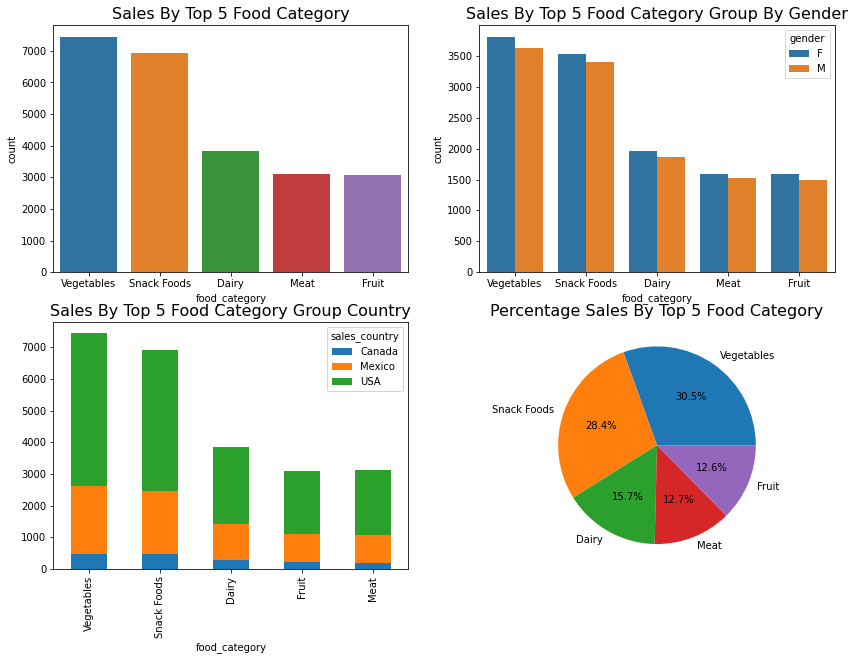

In [ ]:
# Visualisasi berdasarkan Food Category

fig, axes = plt.subplots(2,2, figsize=(14,10))
food = dataframe['food_category'].value_counts().head()
axes[0, 0].set_title('Sales By Top 5 Food Category', size=16)
sns.barplot(y = food.values, x = food.index, ax = axes[0][0])
axes[0, 0].set(xlabel='food_category', ylabel='count')


axes[0, 1].set_title('Sales By Top 5 Food Category Group By Gender', size=16)
sns.countplot(x = 'food_category', hue = 'gender', data = dataframe, order = dataframe['food_category'].value_counts().head().index, ax = axes[0][1])


axes[1, 0].set_title('Sales By Top 5 Food Category Group Country', size=16)
stack_plot = dataframe.groupby(['sales_country', 'food_category']).size().reset_index().pivot(columns='sales_country', index='food_category', values=0).sort_values(by='Canada', ascending= False).head()
stack_plot.plot(kind='bar', stacked=True,ax = axes[1][0])

axes[1, 1].set_title('Percentage Sales By Top 5 Food Category', size=16)
axes[1, 1].pie(dataframe['food_category'].value_counts().head().values, labels=dataframe['food_category'].value_counts().head().index.tolist(), autopct='%1.1f%%')


plt.show()

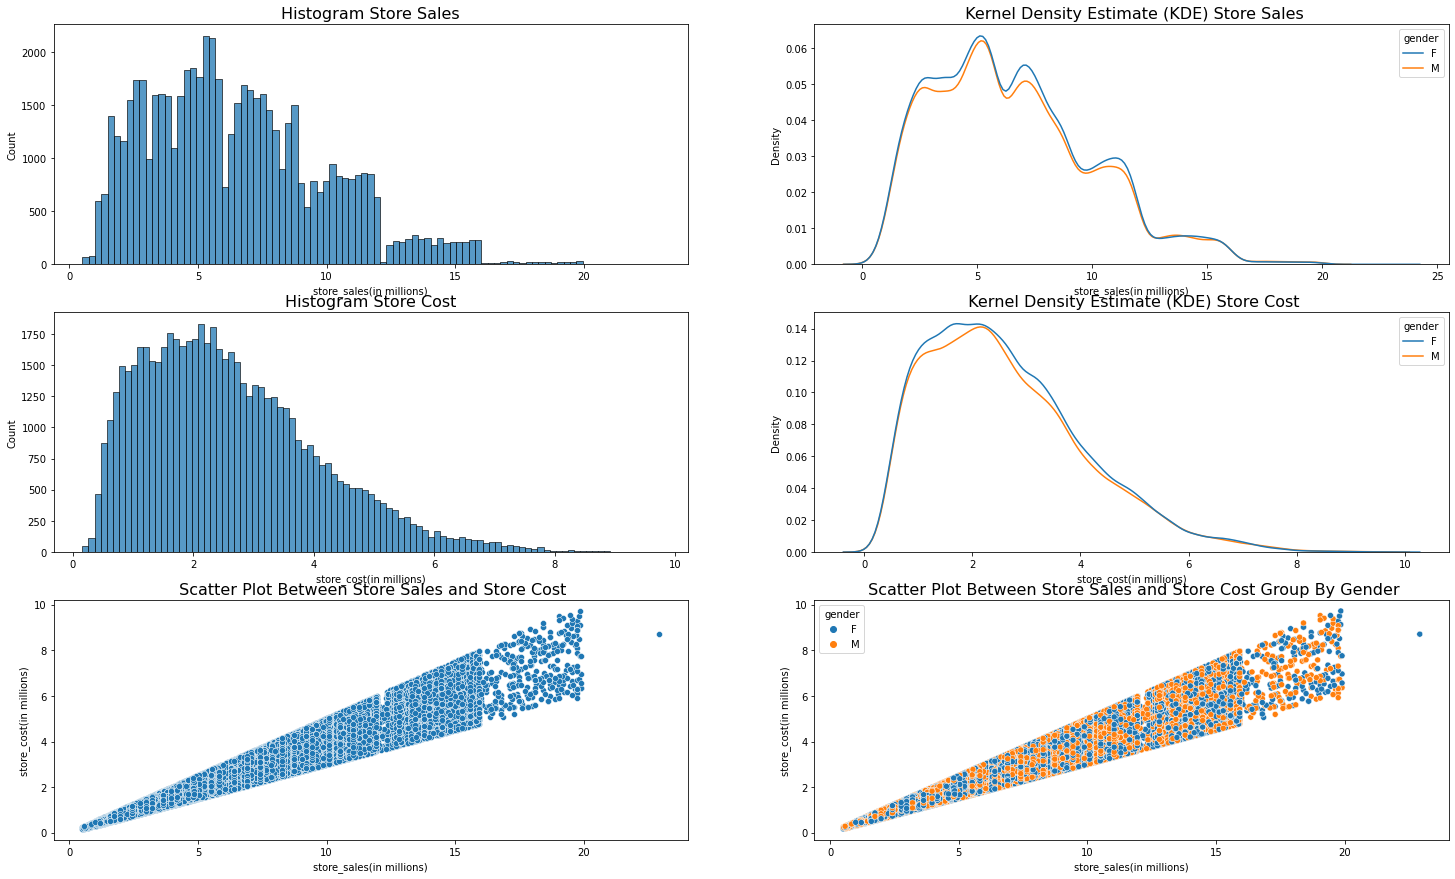

In [ ]:
# Visualisasi berdasarkan Store Sales dan Store Cost
config = plt.figure(figsize=(25, 15))

config.add_subplot(3,2,1)
plt.title('Histogram Store Sales', size=16)
sns.histplot(x='store_sales(in millions)',data = dataframe)

config.add_subplot(3,2,2)
plt.title(' Kernel Density Estimate (KDE) Store Sales', size=16)
sns.kdeplot(x='store_sales(in millions)',data = dataframe, hue='gender')

config.add_subplot(3,2,3)
plt.title('Histogram Store Cost', size=16)
sns.histplot(x='store_cost(in millions)',data = dataframe)

config.add_subplot(3,2,4)
plt.title(' Kernel Density Estimate (KDE) Store Cost', size=16)
sns.kdeplot(x='store_cost(in millions)',data = dataframe, hue='gender')

config.add_subplot(3,2,5)
plt.title(' Scatter Plot Between Store Sales and Store Cost', size=16)
sns.scatterplot(data=dataframe, x='store_sales(in millions)', y='store_cost(in millions)')

config.add_subplot(3,2,6)
plt.title(' Scatter Plot Between Store Sales and Store Cost Group By Gender', size=16)
sns.scatterplot(data=dataframe, x='store_sales(in millions)', y='store_cost(in millions)', hue='gender')

plt.show()

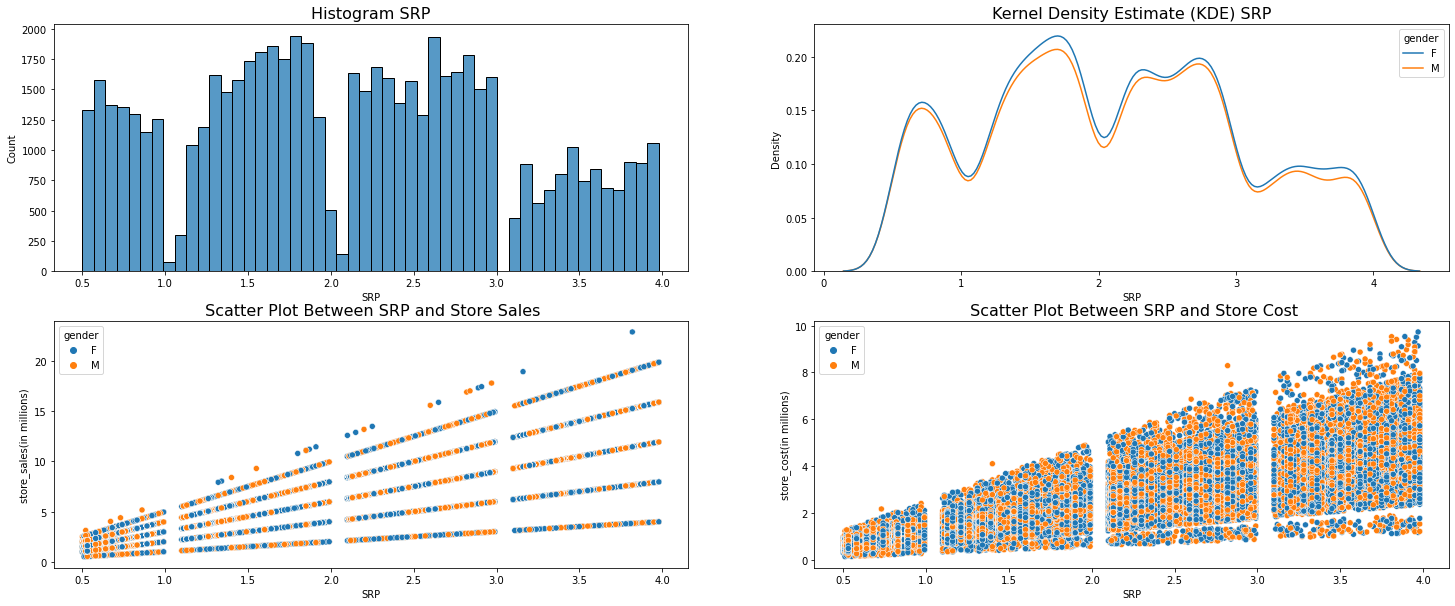

In [ ]:
config = plt.figure(figsize=(25, 10))

config.add_subplot(2,2,1)
plt.title('Histogram SRP', size=16)
sns.histplot(x='SRP',data = dataframe)

config.add_subplot(2,2,2)
plt.title('Kernel Density Estimate (KDE) SRP', size=16)
sns.kdeplot(x='SRP',data = dataframe, hue='gender')

config.add_subplot(2,2,3)
plt.title(' Scatter Plot Between SRP and Store Sales', size=16)
sns.scatterplot(data=dataframe, x='SRP', y='store_sales(in millions)',  hue='gender')

config.add_subplot(2,2,4)
plt.title(' Scatter Plot Between SRP and Store Cost', size=16)
sns.scatterplot(data=dataframe, x='SRP', y='store_cost(in millions)',  hue='gender')

index out of bounds


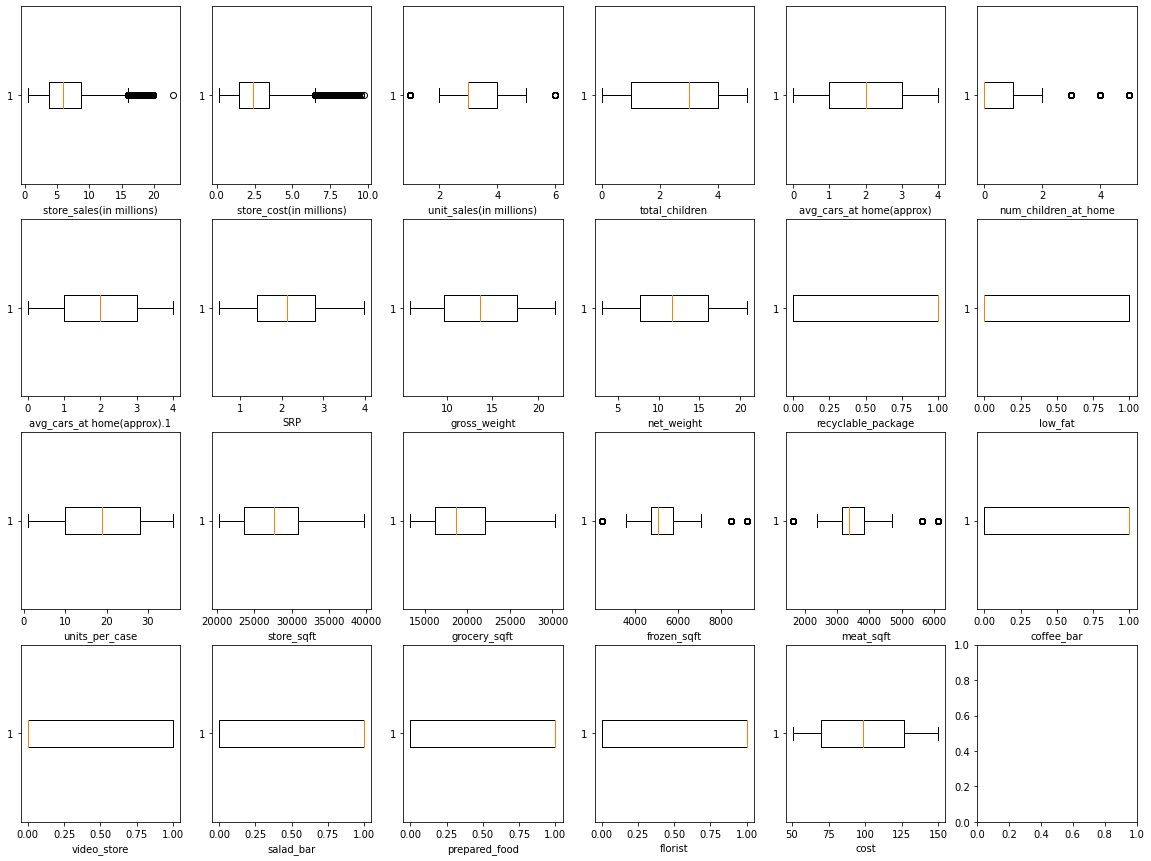

In [ ]:
try :
  temp = dataframe.select_dtypes(include = ['float']).columns
  #------------------------------------------------------------------------------------------------------
  rows = 4
  columns = 6
  count = 0
  fig, axs = plt.subplots(rows, columns, figsize=(20,15))
  for i in range(rows):
      for j in range(columns):
          axs[i, j].boxplot(x = temp[count] ,data = dataframe, vert=False)
          axs[i, j].set_xlabel(temp[count], fontsize=10)
          count += 1       
except IndexError:
  print('index out of bounds') 

# **Data Preprocessing**

### **Data Cleaning**

In [ ]:
# Melihat nilai null pada dataset
dataframe.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [ ]:
# Melihat duplikasi pada dataset
dataframe[dataframe.duplicated()]

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost


In [ ]:
# Drop duplikasi pada dataset
dataframe = dataframe.drop_duplicates()
dataframe.shape

(60428, 40)

### **Data Transforming**

In [ ]:
# Mengubah bentuk kategori menjadi integer 
categorical = ['food_category', 'food_department', 'food_family', 'promotion_name', 'sales_country', 'marital_status','gender',
               'education', 'member_card', 'occupation', 'houseowner', 'avg. yearly_income', 'brand_name', 'store_type', 'store_city', 
               'store_state', 'media_type']
temp = []
for x in categorical:
    print(f'====={x}=====\n')
    print('BEFORE ENCODE: ')
    before = dataframe[x].unique()
    temp.append(before)
    print(before,'\n')
    encode = OrdinalEncoder(categories=[dataframe[x].unique()])
    dataframe[[x]] = encode.fit_transform(dataframe[[x]])
    print('AFTER ENCODE: ')
    print(dataframe[x].unique(),'\n')

=====food_category=====

BEFORE ENCODE: 
['Breakfast Foods' 'Bread' 'Canned Shrimp' 'Baking Goods' 'Vegetables'
 'Frozen Desserts' 'Candy' 'Snack Foods' 'Dairy' 'Starchy Foods'
 'Cleaning Supplies' 'Decongestants' 'Meat' 'Hot Beverages'
 'Jams and Jellies' 'Carbonated Beverages' 'Seafood' 'Specialty'
 'Kitchen Products' 'Electrical' 'Beer and Wine' 'Candles' 'Fruit'
 'Pure Juice Beverages' 'Canned Soup' 'Paper Products' 'Canned Tuna'
 'Eggs' 'Hardware' 'Canned Sardines' 'Canned Clams' 'Pain Relievers'
 'Side Dishes' 'Bathroom Products' 'Magazines' 'Frozen Entrees' 'Pizza'
 'Cold Remedies' 'Canned Anchovies' 'Drinks' 'Hygiene' 'Plastic Products'
 'Canned Oysters' 'Packaged Vegetables' 'Miscellaneous'] 

AFTER ENCODE: 
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44.] 

=====food_department=====

BEFORE ENCODE: 
['Frozen Foods' 'Baked Goods' 'Canned Foods'

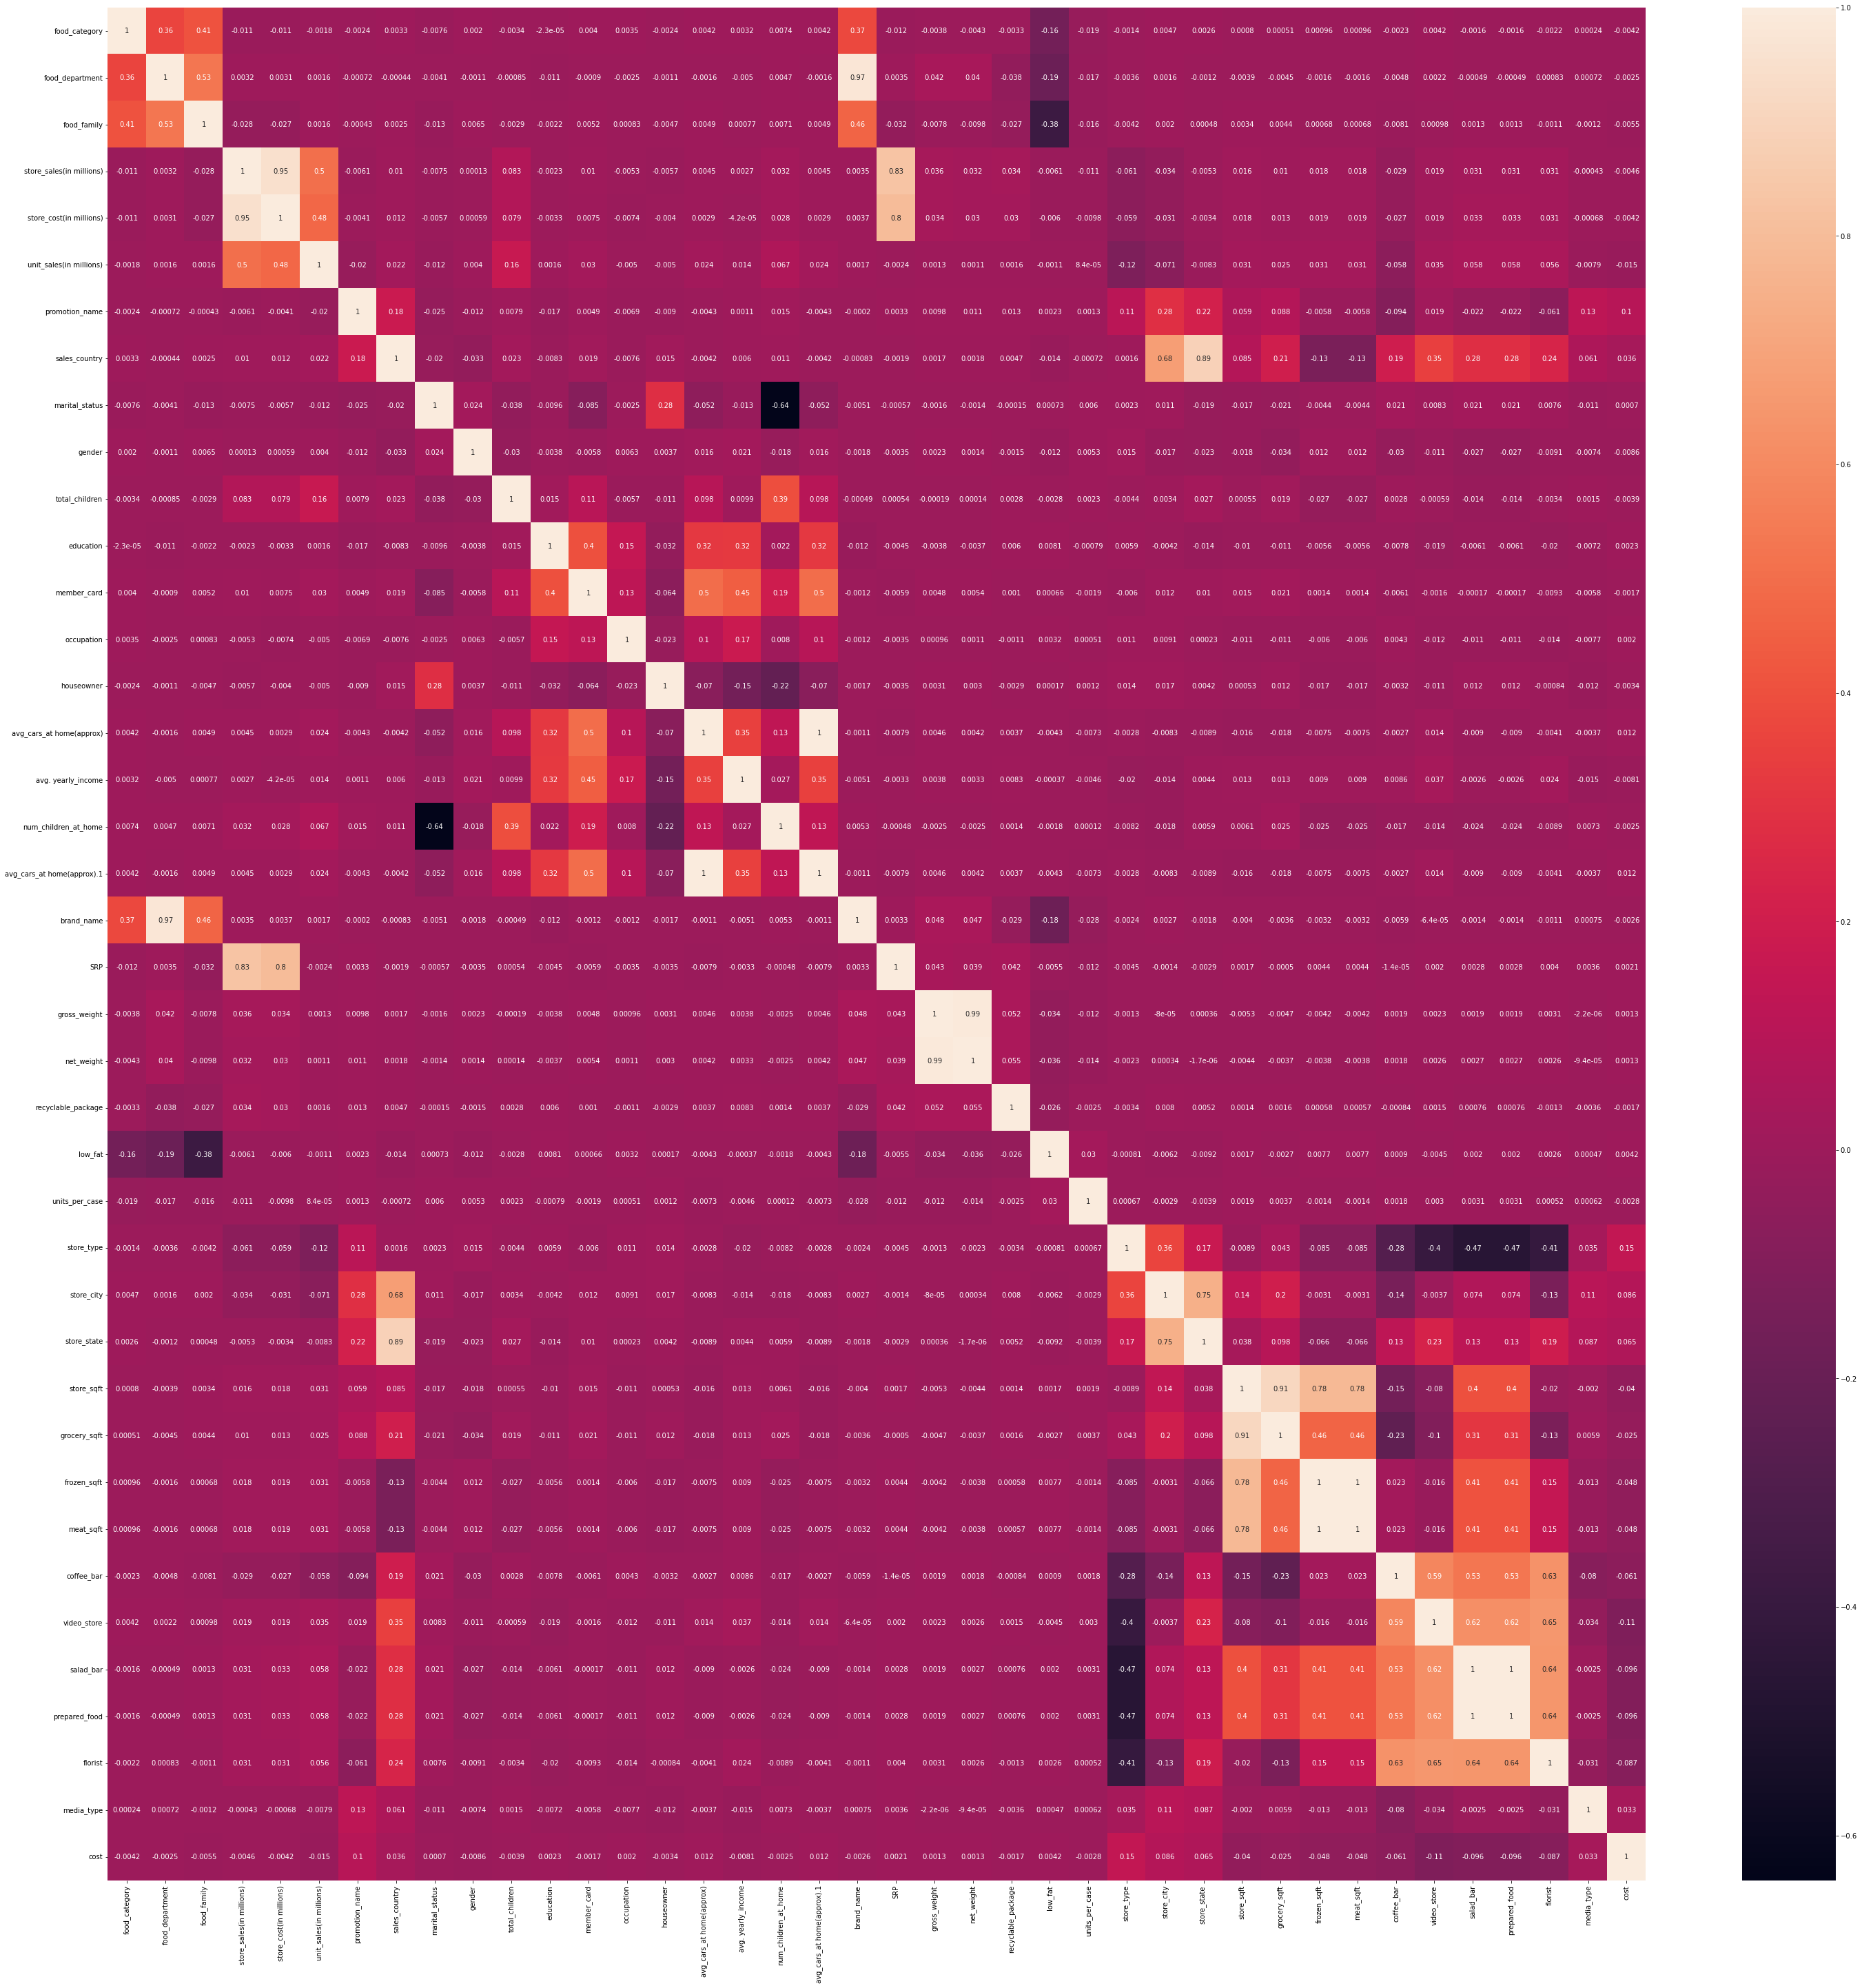

In [ ]:
# Heat Map Coeff
plt.figure(figsize=(50,50))
sns.heatmap(dataframe.corr(), annot=True)

### **Feature Selection**

In [ ]:
# Drop kolom yang tidak dibutuhkan
dataframe = dataframe.drop(columns=['food_category','food_department','food_family','store_sales(in millions)','store_cost(in millions)', 
                                    'unit_sales(in millions)','gender','total_children','member_card','houseowner','avg. yearly_income',
                                    'num_children_at_home','brand_name','recyclable_package','units_per_case','store_sqft','grocery_sqft',
                                    'frozen_sqft','meat_sqft','coffee_bar','video_store','salad_bar','prepared_food','florist','media_type'],
                           axis=1)

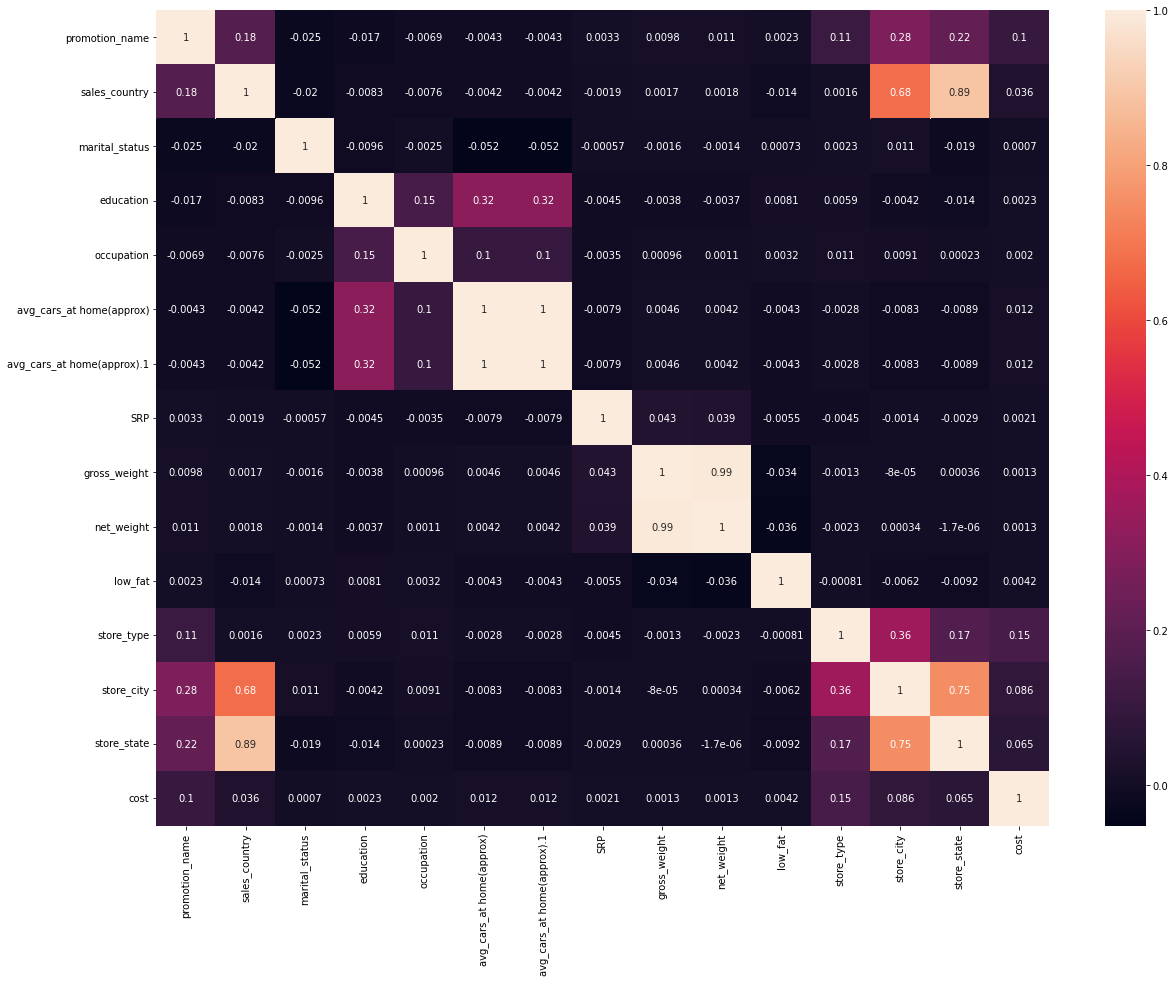

In [ ]:
# Heat Map Coeff
plt.figure(figsize=(20,15))
sns.heatmap(dataframe.corr(), annot=True)

# **Modelling**

In [ ]:
# Menentukan varibel X dan y
X = dataframe.drop(columns = ['cost'])
y = dataframe['cost']

In [ ]:
# Split data menjadi training dan testing dengan ration 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Model Decision Tree 
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt) 
print(f'r2 score Decision Tree: {r2_dt}' )

r2 score Decision Tree: 0.8285716763670741


In [ ]:
# Model RandomForest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2)
model_rf = RandomForestRegressor()
model_rf.fit(X_train_rf, y_train_rf)
y_pred_rf = model_rf.predict(X_test_rf)
y_pred_rf_train = model_rf.predict(X_train_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)
print(f'r2 score Random Forest: {r2_rf} ')

r2 score Random Forest: 0.8982167072356513 


In [ ]:
# Model Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'r2 score Linear Regression: {r2_lr}')

r2 score Linear Regression: 0.02445190169496181


In [ ]:
# Model SVR
model_svr = LinearSVR()
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'r2 score SVR: {r2_svr}')

r2 score SVR: 0.010146943512316708


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Model KNN
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'r2 score KNN: {r2_knn}')

r2 score KNN: 0.6116877589129399


In [ ]:
r2_df =  pd.DataFrame({'Algoritma': ['Decision Tree', 'Random Forest', 'Linear Regession', 'SVR', 'KNN'], 'r2 score':[r2_dt, r2_rf, r2_lr,r2_svr,r2_knn]})
r2_df

,Algoritma,r2 score
0,Decision Tree,0.828572
1,Random Forest,0.898217
2,Linear Regession,0.024452
3,SVR,0.010147
4,KNN,0.611688


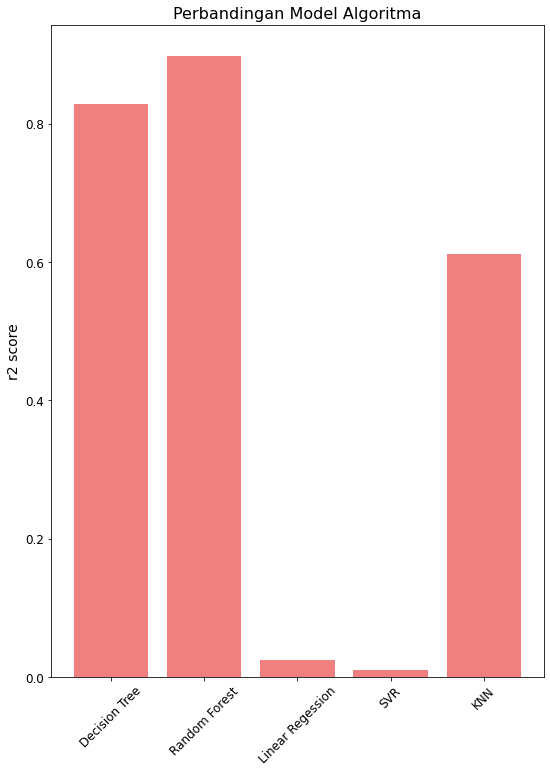

In [ ]:
config = plt.figure(figsize=(30, 12))

config.add_subplot(1,3,1)
barchart = plt.bar(r2_df['Algoritma'], r2_df['r2 score'] , color='lightcoral')

plt.title('Perbandingan Model Algoritma', size=16)
plt.ylabel('r2 score', size=14)
plt.xticks(size=12, rotation = 45)
plt.yticks(size=12)

plt.show()

In [ ]:
y_pred_rf_df = pd.DataFrame({'Nilai Aktual': y_test_rf,'Nilai Prediksi':y_pred_rf, 'Perbedaan (Aktual -  Prediksi)': y_test_rf - y_pred_rf})
y_pred_rf_df[0:20]

,Nilai Aktual,Nilai Prediksi,Perbedaan (Aktual - Prediksi)
53420,67.31,67.3100,-1.421085e-13
53349,111.51,111.5100,-1.705303e-13
10791,83.26,83.2600,-1.989520e-13
31729,138.81,138.8100,1.136868e-13
39161,91.28,91.2800,1.278977e-13
50227,124.36,124.3600,-4.405365e-13
25245,83.51,83.5100,-1.989520e-13
39614,59.83,59.8300,6.394885e-14
40197,97.34,102.0909,-4.750900e+00
5576,91.58,89.2808,2.299200e+00


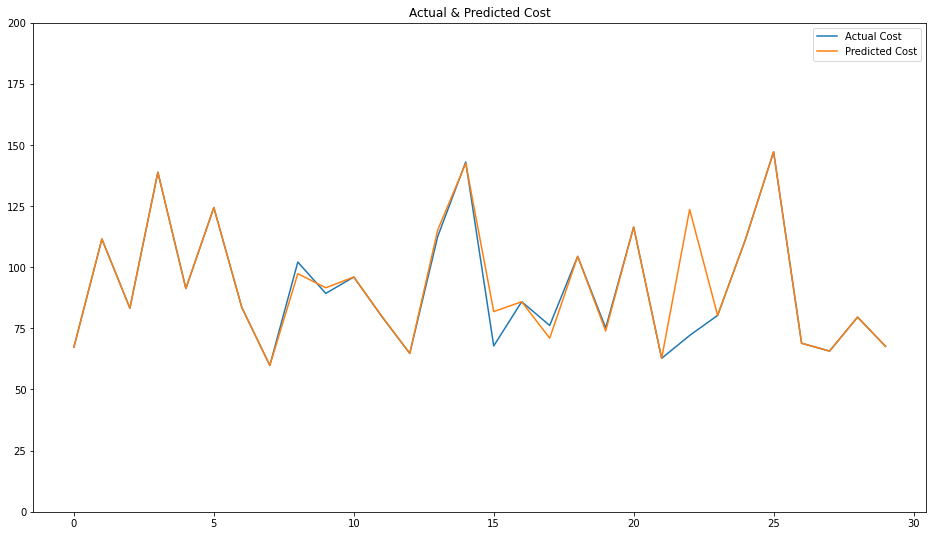

In [ ]:
df = pd.DataFrame({'Predicted Cost':y_pred_rf, 'Actual Cost':y_test_rf})
fig= plt.figure(figsize=(16, 9))
df = df.reset_index()
df = df.drop(['index'],axis=1)
plt.plot(df[:30])
plt.ylim(0, 200)
plt.legend(['Actual Cost','Predicted Cost'])
plt.title('Actual & Predicted Cost')
plt.show()

In [ ]:
X.columns

Index(['promotion_name', 'sales_country', 'marital_status', 'education',
       'occupation', 'avg_cars_at home(approx)', 'avg_cars_at home(approx).1',
       'SRP', 'gross_weight', 'net_weight', 'low_fat', 'store_type',
       'store_city', 'store_state'],
      dtype='object')

Feature: 0, Score: 0.52470
Feature: 1, Score: 0.02195
Feature: 2, Score: 0.00468
Feature: 3, Score: 0.00967
Feature: 4, Score: 0.01086
Feature: 5, Score: 0.00678
Feature: 6, Score: 0.00665
Feature: 7, Score: 0.02638
Feature: 8, Score: 0.01887
Feature: 9, Score: 0.01813
Feature: 10, Score: 0.00287
Feature: 11, Score: 0.05180
Feature: 12, Score: 0.18642
Feature: 13, Score: 0.11023


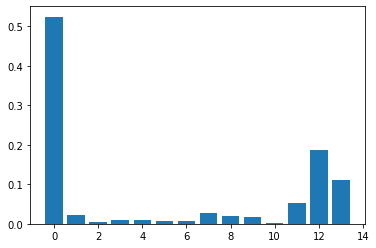

In [ ]:
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Feature Importance')

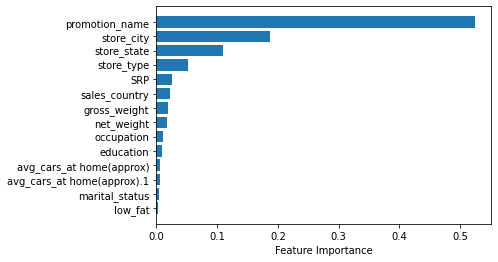

In [ ]:
sort = model_rf.feature_importances_.argsort()
plt.barh(X.columns[sort], model_rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [ ]:
# Prediksi
print('\n==== Sales Country ====')
for x in range (dataframe['sales_country'].nunique()):
  print(f'{x}. {temp[4][x]}', end=", ")

print('\n==== Store State ====')
for x in range (dataframe['store_state'].nunique()):
  print(f'{x}. {temp[15][x]}', end=", ")

print('\n==== Store City ====')
for x in range (dataframe['store_city'].nunique()):
  print(f'{x}. {temp[14][x]}', end=", ")

print('\n==== Store Type ====')
for x in range (dataframe['store_type'].nunique()):
  print(f'{x}. {temp[13][x]}', end=", ")

print('\n4==== Promotion Name =====')
for x in range (dataframe['promotion_name'].nunique()) :
  print(f'{x}. {temp[3][x]}', end=", ")

print('\n==== Marital Status ====')
for x in range (dataframe['marital_status'].nunique()):
  print(f'{x}. {temp[5][x]}', end=", ")

print('\n==== Education ====')
for x in range (dataframe['education'].nunique()):
  print(f'{x}. {temp[7][x]}', end=", ")

print('\n==== Occupation ====')
for x in range (dataframe['occupation'].nunique()):
  print(f'{x}. {temp[9][x]}', end=", ")

print('\n==== Low Fat ====')
print('0. No, 1.Yes')



count = 0
while True :
  if count == 1:
    break
#input Country   
  SCOUNTRY = float(input("\nMasukan Sales Country (Angkanya saja) : "))
#Input State berdasarkan Country
  if SCOUNTRY == 0:
    while True:
      SS = float(input("Masukan Store State (Angkanya saja) : "))
      if SS in dataframe[dataframe.sales_country == 0]['store_state'].unique():
        count += 1
        break
      else :
        print('\nSorry this state doesn`t exist in USA. \nThere are ', dataframe[dataframe.sales_country == 0]['store_state'].unique(),'\n')
  elif SCOUNTRY == 1:
    while True:
      SS = float(input("Masukan Store State (Angkanya saja) : "))
      if SS in dataframe[dataframe.sales_country == 1]['store_state'].unique():
        count += 1
        break
      else :
        print('\nSorry this state doesn`t exist in Mexico.\nThere are', dataframe[dataframe.sales_country == 1]['store_state'].unique(),'\n')
  elif SCOUNTRY == 2:
    while True:
      SS = float(input("Masukan Store State (Angkanya saja) : "))
      if SS in dataframe[dataframe.sales_country == 2]['store_state'].unique():
        count += 1
        break
      else :
        print('\nSorry this state doesn`t exist in Canada. \nThere is ',dataframe[dataframe.sales_country == 2]['store_state'].unique(),'\n')
  else :
    print('\nSorry this Country doesn`t exist in menu options')
#Input City berdasarkan State
if SS == 0 :
  while True:
    SCITY = float(input("Masukan Store City (Angkanya saja) : "))
    if SCITY in dataframe[dataframe.store_state == 0]['store_city'].unique():
      break
    else :
      print('Sorry this city doesn`t exist in Oregon.\n', dataframe[dataframe.store_state == 0]['store_city'].unique(),'\n')
elif SS == 1 :
  while True:
    SCITY = float(input("Masukan Store City (Angkanya saja) : "))
    if dataframe[dataframe.store_state == 0]['store_city'].unique():
      break
    else :
      print('Sorry this city doesn`t exist in Washington.\n', dataframe[dataframe.store_state == 1]['store_city'].unique(),'\n')
elif SS == 2 :
  while True:
    SCITY = float(input("Masukan Store City (Angkanya saja) : "))
    if SCITY in dataframe[dataframe.store_state == 2]['store_city'].unique():
      break
    else :
      print('Sorry this city doesn`t exist in California.\n', dataframe[dataframe.store_state == 2]['store_city'].unique(),'\n')
elif SS == 3 :
  while True:
    SCITY = float(input("Masukan Store City (Angkanya saja) : "))
    if SCITY in dataframe[dataframe.store_state == 3]['store_city'].unique():
      break
    else :
      print('Sorry this city doesn`t exist in Veracruz.\n', dataframe[dataframe.store_state == 3]['store_city'].unique(),'\n')
elif SS == 4 :
  while True:
    SCITY = float(input("Masukan Store City (Angkanya saja) : "))
    if SCITY in dataframe[dataframe.store_state == 4]['store_city'].unique():
      break
    else :
      print('Sorry this city doesn`t exist in Yucatan.\n', dataframe[dataframe.store_state == 4]['store_city'].unique(),'\n')
elif SS == 5 :
  while True:
    SCITY = float(input("Masukan Store City (Angkanya saja) : "))
    if SCITY in dataframe[dataframe.store_state == 5]['store_city'].unique():
      break
    else :
      print('Sorry this city doesn`t exist in Zacatecas.\n', dataframe[dataframe.store_state == 5]['store_city'].unique(),'\n')
elif SS == 6 :
  while True:
    SCITY = float(input("Masukan Store City (Angkanya saja) : "))
    if SCITY in dataframe[dataframe.store_state == 6]['store_city'].unique():
      break
    else :
      print('Sorry this city doesn`t exist in DF.\n', dataframe[dataframe.store_state == 6]['store_city'].unique(),'\n')
elif SS == 7 :
  while True:
    SCITY = float(input("Masukan Store City (Angkanya saja) : "))
    if SCITY in dataframe[dataframe.store_state == 7]['store_city'].unique():
      break
    else :
      print('Sorry this city doesn`t exist in BC.\n', dataframe[dataframe.store_state == 7]['store_city'].unique(),'\n')
elif SS == 8 :
  while True:
    SCITY = float(input("Masukan Store City (Angkanya saja) : "))
    if SCITY in dataframe[dataframe.store_state == 8]['store_city'].unique():
      break
    else :
      print('Sorry this city doesn`t exist in Jalisco.\n', dataframe[dataframe.store_state == 8]['store_city'].unique(),'\n')
elif SS == 9 :
  while True:
    SCITY = float(input("Masukan Store City (Angkanya saja) : "))
    if SCITY in dataframe[dataframe.store_state == 9]['store_city'].unique():
      break
    else :
      print('Sorry this city doesn`t exist in Guerrero.\n', dataframe[dataframe.store_state == 9]['store_city'].unique(),'\n')

ST = float(input("Masukan Store Type (Angkanya saja) : "))
PN = float(input("\n\nMasukan Jenis Promotion Name (Angkanya saja) : "))
MS = float(input("Masukan Jenis Marital Status (Angkanya saja) : "))
EC = float(input("Masukan Jenis Education (Angkanya saja) : "))
OC = float(input("Masukan Jenis Occupation (Angkanya saja) : "))
AVGC = float(input("Masukan Rata - Rata Mobil di rumah (range : 1 - 4) : "))
AVGC1 = float(input("Masukan Rata - Rata Mobil di rumah (range : 1 - 4) : "))
SRP = float(input("Masukan SRP / Rekomendasi harga produk (range : 0.5 - 3.98) : "))
GW = float(input("Masukan Gross Weight (range : 6 - 21.9) : "))
NW = float(input("Masukan Net Weight (range : 3.05 - 20.8) : "))
LF = float(input("Masukan Low Fat (Angkanya saja) : "))


==== Sales Country ====
0. USA, 1. Mexico, 2. Canada, 
==== Store State ====
0. OR, 1. WA, 2. CA, 3. Veracruz, 4. Yucatan, 5. Zacatecas, 6. DF, 7. BC, 8. Jalisco, 9. Guerrero, 
==== Store City ====
0. Salem, 1. Tacoma, 2. Seattle, 3. Spokane, 4. Los Angeles, 5. Beverly Hills, 6. Portland, 7. Bellingham, 8. Orizaba, 9. Merida, 10. Hidalgo, 11. Mexico City, 12. Vancouver, 13. Bremerton, 14. Camacho, 15. Guadalajara, 16. Acapulco, 17. San Francisco, 18. Victoria, 
==== Store Type ====
0. Deluxe Supermarket, 1. Supermarket, 2. Gourmet Supermarket, 3. Small Grocery, 4. Mid-Size Grocery, 
4==== Promotion Name =====
0. Bag Stuffers, 1. Cash Register Lottery, 2. High Roller Savings, 3. Double Down Sale, 4. Green Light Days, 5. Big Time Savings, 6. Price Savers, 7. Price Slashers, 8. Dollar Days, 9. Two Day Sale, 10. Super Duper Savers, 11. Weekend Markdown, 12. Dollar Cutters, 13. Sales Galore, 14. Big Promo, 15. Free For All, 16. Savings Galore, 17. Unbeatable Price Savers, 18. Price Smasher

In [ ]:
model_rf.predict([[PN, SCOUNTRY, MS, EC, OC, AVGC, AVGC1, SRP, GW, NW, LF, ST, SCITY, SS]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([55.96])